# Figures for SHINE Poster 2018
Basic figures for my 2018 SHINE poster

In [1]:
# Setup fonts for portability--only needed when using extra fonts
#import matplotlib.font_manager
#custom_fonts = matplotlib.font_manager.createFontList(matplotlib.font_manager.findSystemFonts(fontpaths=matplotlib.rcParams['datapath']))#'../../fonts/'))
#matplotlib.font_manager.fontManager.ttflist.extend(custom_fonts)

In [25]:
import os
import sys

import numpy as np
from scipy.interpolate import splev
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sunpy.map import Map
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.visualization import ImageNormalize,SqrtStretch,AsinhStretch
import distributed

import synthesizAR
from synthesizAR.instruments import InstrumentSDOAIA

sys.path.append(os.path.join(os.environ['HOME'], 'projects/synthesized_timelag_maps/scripts/'))
from aiacube import DistributedAIACube
from timelags import AIATimeLags

%matplotlib inline

In [3]:
ar = synthesizAR.Field.restore('/storage-home/w/wtb2/data/timelag_synthesis_v2/base_noaa1158/')

In [4]:
ar_high = synthesizAR.Field.restore('/storage-home/w/wtb2/data/timelag_synthesis_v2/high_frequency/field_checkpoint/')
ar_intermediate = synthesizAR.Field.restore('/storage-home/w/wtb2/data/timelag_synthesis_v2/intermediate_frequency/field_checkpoint/')
ar_low = synthesizAR.Field.restore('/storage-home/w/wtb2/data/timelag_synthesis_v2/low_frequency/field_checkpoint/')

In [5]:
aia = InstrumentSDOAIA([0,1]*u.s,None)

In [6]:
rwb_cmap = matplotlib.colors.LinearSegmentedColormap.from_list(
    'rwb_nice', [(215/255, 48/255, 31/255), (1, 1, 1), (5/255, 112/255, 176/255)], N=1000)

In [7]:
columnwidth = 2544.81458 #document width of my poster

In [8]:
def get_figsize(wf=0.5, hf=(5.**0.5-1.0)/2.0, ):
    """Parameters:
      - wf [float]:  width fraction in columnwidth units
      - hf [float]:  height fraction in columnwidth units.
                     Set by default to golden ratio.
      - cwidth [float]: width of the column in latex. Get this from LaTeX 
                             using \showthe\columnwidth
    Returns:  [fig_width,fig_height]: that should be given to matplotlib
    """
    fig_width_pt = columnwidth*wf 
    inches_per_pt = 1.0/72.27               # Convert pt to inch
    fig_width = fig_width_pt*inches_per_pt  # width in inches
    fig_height = fig_width*hf      # height in inches
    return (fig_width, fig_height)

In [21]:
cluster = distributed.LocalCluster(n_workers=64,threads_per_worker=1,)
client = distributed.Client(cluster)
client

Client Scheduler: tcp://127.0.0.1:46363 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 64 Cores: 64 Memory: 270.38 GB


## AR in HMI and AIA

In [22]:
aia_map = Map('/storage-home/w/wtb2/data/timelag_synthesis_v2/observational_data/aia/cutouts/aia_lev1.5_20110212T153348_171_cutout.fits')

In [23]:
hmi_map = Map('/storage-home/w/wtb2/data/timelag_synthesis_v2/observational_data/hmi/hmi_m_45s_2011_02_12_15_33_45_tai_magnetogram.fits')
hmi_map = hmi_map.rotate(order=3)
hmi_map = hmi_map.submap(aia_map.bottom_left_coord,aia_map.top_right_coord)

/storage-home/w/wtb2/anaconda3/envs/synthesized-timelags/lib/python3.6/site-packages/sunpy-1.0.dev9869-py3.6-linux-x86_64.egg/sunpy/map/mapbase.py:645: Warning: Missing metadata for heliographic longitude: assuming longitude of 0 degrees
  lon=self.heliographic_longitude,
/storage-home/w/wtb2/anaconda3/envs/synthesized-timelags/lib/python3.6/site-packages/sunpy-1.0.dev9869-py3.6-linux-x86_64.egg/sunpy/map/mapbase.py:645: Warning: Missing metadata for heliographic longitude: assuming longitude of 0 degrees
  lon=self.heliographic_longitude,
/storage-home/w/wtb2/anaconda3/envs/synthesized-timelags/lib/python3.6/site-packages/sunpy-1.0.dev9869-py3.6-linux-x86_64.egg/sunpy/map/mapbase.py:645: Warning: Missing metadata for heliographic longitude: assuming longitude of 0 degrees
  lon=self.heliographic_longitude,


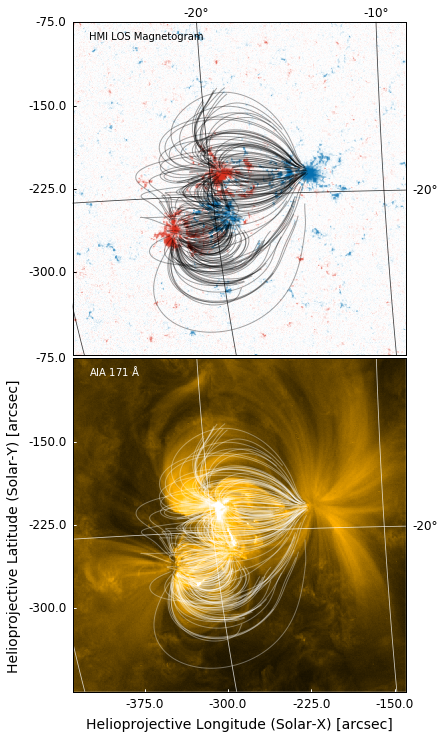

In [79]:
fig = plt.figure(figsize=get_figsize(wf=0.5,hf=0.7))
plt.subplots_adjust(hspace=0.01)
####################
# HMI
ax = fig.add_subplot(2,1,1,projection=hmi_map,)
hmi_map.plot(title=False,annotate=False,norm=matplotlib.colors.SymLogNorm(100,vmin=-1e3,vmax=1e3),cmap=rwb_cmap)
for l in ar.loops[::20]:
    c = l.coordinates.transform_to('heliographic_stonyhurst').transform_to(hmi_map.coordinate_frame)
    ax.plot_coord(c, '-', color='k', lw=1, alpha=0.35)
ax.grid(alpha=0)
lon,lat = ax.coords[0],ax.coords[1]
lon.set_ticklabel_visible(False)
lon.set_ticks_visible(False)
lat.set_ticklabel(fontsize=plt.rcParams['ytick.labelsize'])
hgs_lon,hgs_lat = hmi_map.draw_grid(axes=ax,grid_spacing=10*u.deg,alpha=0.75,color='k')
#hgs_lat.set_axislabel('')
#hgs_lon.set_axislabel('')
#hgs_lat.set_ticklabel_visible(False)
#hgs_lon.set_ticklabel_visible(False)
hgs_lon.set_axislabel('')#'Helioprojective Longitude [arcsec]',fontsize=plt.rcParams['axes.labelsize'])
hgs_lat.set_axislabel('')#'Helioprojective Latitude [arcsec]',fontsize=plt.rcParams['axes.labelsize'])
hgs_lat.set_ticks_visible(False)
hgs_lon.set_ticks_visible(False)
hgs_lon.set_ticklabel(fontsize=plt.rcParams['xtick.labelsize'])
hgs_lat.set_ticklabel(fontsize=plt.rcParams['ytick.labelsize'])
xtext,ytext = hmi_map.world_to_pixel(SkyCoord(Tx=-425*u.arcsec,Ty=-90*u.arcsec,frame=hmi_map.coordinate_frame))
xtext,ytext = int(xtext.value),int(ytext.value)
ax.text(xtext,ytext,'HMI LOS Magnetogram',color='k')#,fontsize=plt.rcParams['axes.labelsize'])
#####################
# AIA -- 171
ax = fig.add_subplot(2,1,2,projection=aia_map,)
aia_map.plot(title=False,annotate=True,norm=ImageNormalize(vmin=0,vmax=5e3,stretch=AsinhStretch(0.1)))
for l in ar.loops[::20]:
    c = l.coordinates.transform_to('heliographic_stonyhurst').transform_to(aia_map.coordinate_frame)
    ax.plot_coord(c, '-', color='w', lw=1, alpha=0.35)
ax.grid(alpha=0)
lon,lat = ax.coords[0],ax.coords[1]
lon.set_ticks(color='w')
lat.set_ticks(color='w')
lon.set_ticklabel(fontsize=plt.rcParams['xtick.labelsize'])
lat.set_ticklabel(fontsize=plt.rcParams['ytick.labelsize'])
lon.set_axislabel(lon.get_axislabel(),fontsize=plt.rcParams['axes.labelsize'])
lat.set_axislabel(lat.get_axislabel(),fontsize=plt.rcParams['axes.labelsize'])
hgs_lon,hgs_lat = aia_map.draw_grid(axes=ax,grid_spacing=10*u.deg,alpha=0.75,color='w')
hgs_lat.set_axislabel('')#hgs_lat.get_axislabel(),fontsize=plt.rcParams['axes.labelsize'])
hgs_lon.set_axislabel('')
hgs_lat.set_ticklabel_visible(True)
hgs_lat.set_ticklabel(fontsize=plt.rcParams['ytick.labelsize'])
hgs_lon.set_ticklabel_visible(False)
hgs_lat.set_ticks_visible(False)
hgs_lon.set_ticks_visible(False)
xtext,ytext = aia_map.world_to_pixel(SkyCoord(Tx=-425*u.arcsec,Ty=-90*u.arcsec,frame=aia_map.coordinate_frame))
xtext,ytext = int(xtext.value),int(ytext.value)
ax.text(xtext,ytext,'AIA 171 $\mathrm{\AA}$',color='w')#,fontsize=plt.rcParams['axes.labelsize'])
#######################
# Save
fig.savefig('../figures/hmi_plus_aia_plus_lines.pdf',)

## Heating

In [26]:
i_loop=6

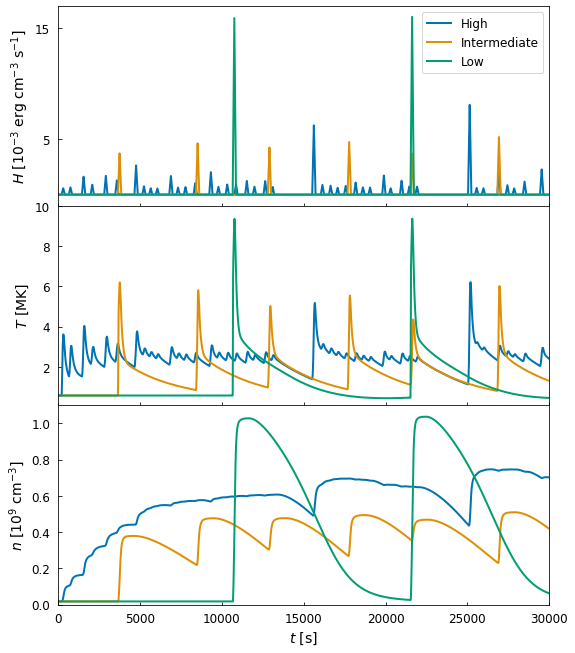

In [29]:
fig,axes = plt.subplots(3,1,figsize=get_figsize(wf=0.25,hf=1.25),sharex=True)
colors = sns.color_palette(palette='colorblind',n_colors=3)
# Heating
## Read the heating 
h = np.loadtxt(os.path.join(os.path.dirname(
    ar_high.loops[i_loop].parameters_savefile),f'hydro_results/{ar_high.loops[i_loop].name}'))[:,-1]
axes[0].plot(ar_high.loops[i_loop].time, 1e3*h, color=colors[0],label='High')
h = np.loadtxt(os.path.join(os.path.dirname(
    ar_intermediate.loops[i_loop].parameters_savefile),f'hydro_results/{ar_intermediate.loops[i_loop].name}'))[:,-1]
axes[0].plot(ar_intermediate.loops[i_loop].time, 1e3*h, color=colors[1],label='Intermediate')
h = np.loadtxt(os.path.join(os.path.dirname(
    ar_low.loops[i_loop].parameters_savefile),f'hydro_results/{ar_low.loops[i_loop].name}'))[:,-1]
axes[0].plot(ar_low.loops[i_loop].time, 1e3*h, color=colors[2],label='Low')
axes[0].legend()

# Temperature
axes[1].plot(ar_high.loops[i_loop].time,ar_high.loops[i_loop].electron_temperature[:,0].to(u.MK),
             color=colors[0],)
axes[1].plot(ar_intermediate.loops[i_loop].time,ar_intermediate.loops[i_loop].electron_temperature[:,0].to(u.MK),
             color=colors[1],)
axes[1].plot(ar_low.loops[i_loop].time,ar_low.loops[i_loop].electron_temperature[:,0].to(u.MK),
             color=colors[2],)

# Density
axes[2].plot(ar_high.loops[i_loop].time,ar_high.loops[i_loop].density[:,0]/1e9,
             color=colors[0],)
axes[2].plot(ar_intermediate.loops[i_loop].time,ar_intermediate.loops[i_loop].density[:,0]/1e9,
             color=colors[1],)
axes[2].plot(ar_low.loops[i_loop].time,ar_low.loops[i_loop].density[:,0]/1e9,
             color=colors[2],)

# Labels and limits
axes[0].set_xlim(0,3e4)
axes[0].set_ylim(-1,17)
axes[0].set_yticks(axes[0].get_yticks()[2:-1:2])
axes[1].set_ylim(0.1,10)
axes[2].set_ylim(0,1.1)
axes[0].set_ylabel(r'$H$ [$10^{-3}$ erg cm$^{-3}$ s$^{-1}$]')
axes[1].set_ylabel(r'$T$ [MK]')
axes[2].set_ylabel(r'$n$ [10$^9$ cm$^{-3}$]')
axes[2].set_xlabel(r'$t$ [s]')

# Adjustments
plt.subplots_adjust(hspace=0.)
fig.savefig('../figures/hydro_profiles.pdf',)

## Intensities

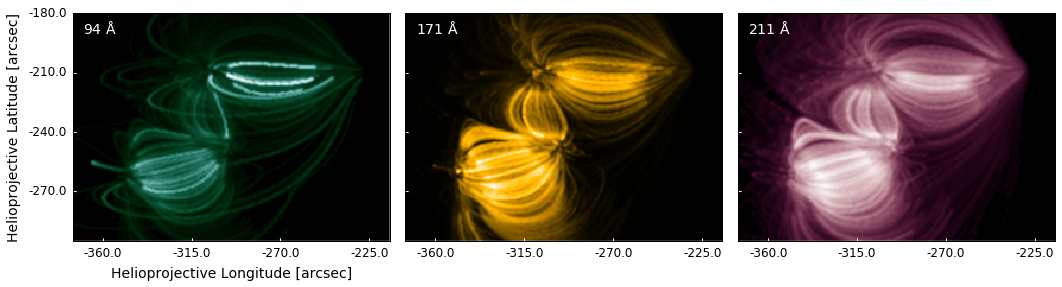

In [73]:
fig = plt.figure(figsize=get_figsize(wf=0.5))
fits_template = '/storage-home/w/wtb2/data/timelag_synthesis_v2/intermediate_frequency/nei/SDO_AIA/{}/map_t{:06d}.fits'
i_time = 2500
for i,c in enumerate(np.array(aia.channels)[[0,2,4]]):
    m = Map(fits_template.format(c['name'],i_time))
    m = m.submap(SkyCoord(-375*u.arcsec,-295*u.arcsec,frame=m.coordinate_frame),
                 SkyCoord(-215*u.arcsec,-180*u.arcsec,frame=m.coordinate_frame))
    ax = fig.add_subplot(1,3,i+1,projection=m)
    norm = ImageNormalize(vmin=m.data[m.data>0].min(),vmax=m.data[m.data>0].max(),stretch=AsinhStretch(a=0.05))
    m.plot(axes=ax,title=False,annotate=False,norm=norm)
    ax.grid(alpha=0)
    lon,lat = ax.coords[0],ax.coords[1]
    lon.set_ticks(color='w')
    lat.set_ticks(color='w')
    if i==0:
        lon.set_axislabel(r'Helioprojective Longitude [arcsec]',fontsize=plt.rcParams['axes.labelsize'])
        lat.set_axislabel(r'Helioprojective Latitude [arcsec]',fontsize=plt.rcParams['axes.labelsize'])
        lat.set_ticklabel(fontsize=plt.rcParams['ytick.labelsize'])
    else:
        lat.set_ticklabel_visible(False)
    lon.set_ticklabel(fontsize=plt.rcParams['xtick.labelsize'])
    xtext,ytext = m.world_to_pixel(SkyCoord(-370*u.arcsec,-190*u.arcsec,frame=m.coordinate_frame),)
    xtext,ytext = int(xtext.value),int(ytext.value)
    ax.text(xtext,ytext,f"{c['name']} $\mathrm{{\AA}}$",color='w',fontsize=plt.rcParams['axes.labelsize'])
plt.subplots_adjust(wspace=0.05,hspace=0.05)
fig.savefig('../figures/aia_intensity_maps.pdf')

## Timelags--1D Example

In [31]:
read_template = '/storage-home/w/wtb2/data/timelag_synthesis_v2/cooling/nei/SDO_AIA/{}/map_t{:06d}.fits'

In [32]:
tl_cooling = AIATimeLags(*[DistributedAIACube.from_files([read_template.format(c['name'],i) for i in range(0,1000)]) 
                           for c in aia.channels])

In [33]:
lc = (-325*u.arcsec,-345*u.arcsec)
rc = (-320*u.arcsec,-340*u.arcsec)

In [34]:
ts_1d = {f"{float(c['name']):.1f}": tl_cooling.make_timeseries(f"{float(c['name']):.1f}", lc, rc).compute()
         for c in aia.channels}

In [57]:
channel_pairs = [(94,335),(335,171),(211,131),(193,211),(171,131)]#[(335.0,171.0),,,(94.0,171.0)]

In [58]:
cc_1d = {f'{cp[0]}-{cp[1]}': tl_cooling.correlation_1d(float(cp[0]), float(cp[1]), lc, rc).compute() 
         for cp in channel_pairs}

Figure with a 1D timeseries and correlation

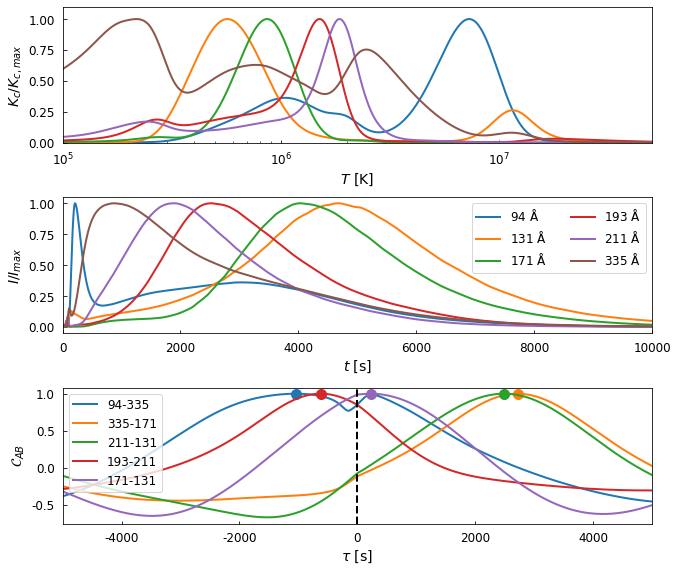

In [60]:
fig = plt.figure(figsize=get_figsize(wf=0.3,hf=0.9))
# Response functions
ax = fig.add_subplot(3,1,1)
temperature = np.logspace(5,8,1000)*u.K
for i,c in enumerate(aia.channels):
    kc = splev(temperature, c['temperature_response_spline'])
    ax.plot(temperature,kc/kc.max(),
            label=r'{} $\mathrm{{\AA}}$'.format(c['name']),color=f'C{i}')
ax.set_xscale('log')
ax.set_xlim(1e5,5e7)
ax.set_ylim(0,1.1)
ax.set_xlabel(r'$T$ [K]')
ax.set_ylabel(r'$K_c/K_{c,max}$')
# Timeseries
ax = fig.add_subplot(3,1,2)
for i,c in enumerate(ts_1d):
    ax.plot(tl_cooling[c].time,ts_1d[c]/ts_1d[c].max(),
            label=r'{:.0f} $\mathrm{{\AA}}$'.format(float(c)),
            color=f'C{i}')
ax.set_xlim(0,10000)
ax.set_xlabel(r'$t$ [s]')
ax.set_ylabel(r'$I/I_{max}$')
ax.legend(loc=1,ncol=2)
# Correlations
ax = fig.add_subplot(3,1,3)
for i,cp in enumerate(cc_1d):
    cc = cc_1d[cp]/cc_1d[cp].max()
    ax.plot(tl_cooling.timelags, cc,
            label=r'{:.0f}-{:.0f}'.format(float(cp.split('-')[0]),float(cp.split('-')[1])),
            color=f'C{i}')
    ax.plot(tl_cooling.timelags[np.argmax(cc)],cc.max(),ls='',marker='o',markersize=10)
ax.set_xlim(-5000,5000)
ax.axvline(x=0,ls='--',color='k')
ax.legend(loc=2)
ax.set_xlabel(r'$\tau$ [s]')
ax.set_ylabel(r'$\mathcal{C}_{AB}$')
plt.subplots_adjust(hspace=0.4)
fig.savefig('../figures/timeseries_timelags_1d.pdf')